In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the Dataset

In [2]:
data=pd.read_csv('./dataset/Bengaluru_House_Data.csv')

## Evaluation the dataset

In [3]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
data.shape

(13320, 9)

In [5]:
data.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

- `size` have to be converted to integer
- `total_sqft` have to be converted to float

In [6]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
data.isnull().sum()/data.shape[0]*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

- Will drop the `society` column as 41% of the data is missing

## Handling missing or wrong datatypes values

   - `size` will change the datatype and then fill the missing value
   - `total_sqft` will change the datatype to float
   - `balcony` will fill the missing data with its median
   - `location` will fill the missing data with its mode
   - `bath` will fill the missing data with its median

### location

In [8]:
data.location

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13320, dtype: object

In [9]:
data.location.value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [10]:
data.location.mode()[0]

'Whitefield'

**filling the location with `whitefield`**

In [11]:
data.location.fillna(data.location.mode()[0],inplace=True)

In [12]:
data.isnull().sum()/data.shape[0]*100

area_type        0.000000
availability     0.000000
location         0.000000
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

### size

In [13]:
data['size']

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13320, dtype: object

**changing the datatype to integer**

In [14]:
def BHK(x):
    if(type(x)!=float):
        return int(x.split(" ")[0])
    else:
        return x

In [15]:
data['size']=data['size'].apply(BHK)

**Handling missing value**

In [16]:
data['size'].describe()

count    13304.000000
mean         2.803743
std          1.294974
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         43.000000
Name: size, dtype: float64

**Filling nan value with median i.e `3`**

In [17]:
data['size'].fillna(3,inplace=True)

In [18]:
data['size']=data['size'].astype(int)

In [19]:
data['size']

0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: size, Length: 13320, dtype: int32

In [20]:
data.isnull().sum()/data.shape[0]*100

area_type        0.000000
availability     0.000000
location         0.000000
size             0.000000
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

### society

**Dropping the society column**

In [21]:
data.drop(['society'],axis=1,inplace=True)

In [22]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,1200,2.0,1.0,51.00


### total_sqft

In [23]:
data.total_sqft.value_counts()

1200    843
1100    221
1500    205
2400    196
600     180
       ... 
3580      1
2461      1
1437      1
2155      1
4689      1
Name: total_sqft, Length: 2117, dtype: int64

In [24]:
data.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [25]:
def convert_sqft(x):
    temp=x.split('-')
    if len(temp)==2:
        return (float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return np.nan

In [26]:
data.total_sqft=data.total_sqft.apply(convert_sqft)

In [27]:
data.dtypes

area_type        object
availability     object
location         object
size              int32
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object

In [28]:
data.total_sqft.describe()

count    13274.000000
mean      1559.626694
std       1238.405258
min          1.000000
25%       1100.000000
50%       1276.000000
75%       1680.000000
max      52272.000000
Name: total_sqft, dtype: float64

**Handling missing value**

In [29]:
data.total_sqft.fillna(data.total_sqft.median(),inplace=True)

In [30]:
data.isnull().sum()/data.shape[0]*100

area_type       0.000000
availability    0.000000
location        0.000000
size            0.000000
total_sqft      0.000000
bath            0.548048
balcony         4.572072
price           0.000000
dtype: float64

### bath

In [31]:
data.bath

0        2.0
1        5.0
2        2.0
3        3.0
4        2.0
        ... 
13315    4.0
13316    5.0
13317    2.0
13318    4.0
13319    1.0
Name: bath, Length: 13320, dtype: float64

In [32]:
data.bath.describe()

count    13247.000000
mean         2.692610
std          1.341458
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: bath, dtype: float64

In [33]:
data['bath']=data.bath.fillna(data.bath.median())

**Changing datatype to int**

In [34]:
data['bath']=data.bath.astype(int)

In [35]:
data.isnull().sum()/data.shape[0]*100

area_type       0.000000
availability    0.000000
location        0.000000
size            0.000000
total_sqft      0.000000
bath            0.000000
balcony         4.572072
price           0.000000
dtype: float64

### balcony

In [36]:
data.balcony

0        1.0
1        3.0
2        3.0
3        1.0
4        1.0
        ... 
13315    0.0
13316    NaN
13317    1.0
13318    1.0
13319    1.0
Name: balcony, Length: 13320, dtype: float64

In [37]:
data.balcony.describe()

count    12711.000000
mean         1.584376
std          0.817263
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: balcony, dtype: float64

**filling null data with its median**

In [38]:
data.balcony.fillna(data.balcony.median(),inplace=True)

**Changing datatype to int**

In [39]:
data['balcony']=data['balcony'].astype(int)

In [40]:
data.isnull().sum()/data.shape[0]*100

area_type       0.0
availability    0.0
location        0.0
size            0.0
total_sqft      0.0
bath            0.0
balcony         0.0
price           0.0
dtype: float64

In [41]:
data.dtypes

area_type        object
availability     object
location         object
size              int32
total_sqft      float64
bath              int32
balcony           int32
price           float64
dtype: object

**Dropping `availability` as this column is no use for our model**

In [42]:
data.drop(['availability'],axis=1,inplace=True)

## Advance Analysis

### Making a new columns `price_pre_sqft`

In [43]:
data['price_pre_sqft']=(data.price*100000)/data.total_sqft

In [44]:
data.head()

,area_type,location,size,total_sqft,bath,balcony,price,price_pre_sqft
0,Super built-up Area,Electronic City Phase II,2,1056.0,2,1,39.07,3699.810606
1,Plot Area,Chikka Tirupathi,4,2600.0,5,3,120.00,4615.384615
2,Built-up Area,Uttarahalli,3,1440.0,2,3,62.00,4305.555556
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3,1,95.00,6245.890861
4,Super built-up Area,Kothanur,2,1200.0,2,1,51.00,4250.000000


### Handling locations
- locations which have value counts less than or equal to 20 will be replaced with `other`

In [45]:
loc_count=data.location.value_counts()

In [46]:
loc_count_20=loc_count[loc_count<=20]
loc_count_20

HBR Layout                        20
Poorna Pragna Layout              20
Yelachenahalli                    20
Sanjay nagar                      20
Kalyan nagar                      19
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: location, Length: 1161, dtype: int64

In [47]:
data['location']=data.location.apply(lambda x : 'other' if x in loc_count_20 else x.strip())

In [48]:
data.location.value_counts()

other                 4299
Whitefield             541
Sarjapur  Road         399
Electronic City        302
Kanakpura Road         273
                      ... 
Domlur                  22
Hoskote                 22
Binny Pete              21
Basaveshwara Nagar      21
Ulsoor                  21
Name: location, Length: 145, dtype: int64

### Outliner detection and removal

In [49]:
data.describe()

,size,total_sqft,bath,balcony,price,price_pre_sqft
count,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,1.332000e+04
mean,2.803979,1558.647202,2.688814,1.603378,112.565627,7.919404e+03
std,1.294214,1236.376834,1.338754,0.803067,148.971674,1.062471e+05
min,1.000000,1.000000,1.000000,0.000000,8.000000,2.678298e+02
25%,2.000000,1100.000000,2.000000,1.000000,50.000000,4.266667e+03
50%,3.000000,1276.000000,2.000000,2.000000,72.000000,5.440000e+03
75%,3.000000,1678.000000,3.000000,2.000000,120.000000,7.328359e+03
max,43.000000,52272.000000,40.000000,3.000000,3600.000000,1.200000e+07


In [50]:
data.rename(columns={'size':'bhk'},inplace=True)

In [51]:
data

,area_type,location,bhk,total_sqft,bath,balcony,price,price_pre_sqft
0,Super built-up Area,Electronic City Phase II,2,1056.0,2,1,39.07,3699.810606
1,Plot Area,other,4,2600.0,5,3,120.00,4615.384615
2,Built-up Area,Uttarahalli,3,1440.0,2,3,62.00,4305.555556
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3,1,95.00,6245.890861
4,Super built-up Area,Kothanur,2,1200.0,2,1,51.00,4250.000000
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5,3453.0,4,0,231.00,6689.834926
13316,Super built-up Area,other,4,3600.0,5,2,400.00,11111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,2,1141.0,2,1,60.00,5258.545136
13318,Super built-up Area,Padmanabhanagar,4,4689.0,4,1,488.00,10407.336319


In [52]:
data.describe()

,bhk,total_sqft,bath,balcony,price,price_pre_sqft
count,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,1.332000e+04
mean,2.803979,1558.647202,2.688814,1.603378,112.565627,7.919404e+03
std,1.294214,1236.376834,1.338754,0.803067,148.971674,1.062471e+05
min,1.000000,1.000000,1.000000,0.000000,8.000000,2.678298e+02
25%,2.000000,1100.000000,2.000000,1.000000,50.000000,4.266667e+03
50%,3.000000,1276.000000,2.000000,2.000000,72.000000,5.440000e+03
75%,3.000000,1678.000000,3.000000,2.000000,120.000000,7.328359e+03
max,43.000000,52272.000000,40.000000,3.000000,3600.000000,1.200000e+07


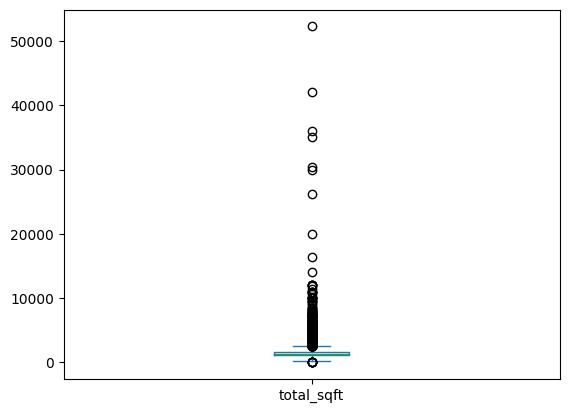

In [53]:
data.total_sqft.plot.box()
plt.show()

In [54]:
(data.total_sqft/data.bhk).describe()

count    13320.000000
mean       574.675341
std        387.502846
min          0.250000
25%        473.000000
50%        552.000000
75%        625.000000
max      26136.000000
dtype: float64

keeping the data which have `400 or greater` sqft per room

In [55]:
data=data[(data.total_sqft/data.bhk)>=400]

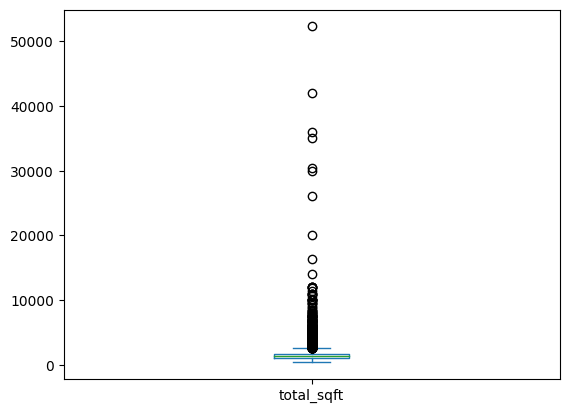

In [56]:
data.total_sqft.plot.box()
plt.show()

In [57]:
def remove_outliner_sqft(df):
    df_out=pd.DataFrame()
    for k,subdf in df.groupby('location'):
        m=subdf.price_pre_sqft.mean()
        std=subdf.price_pre_sqft.std()
        
        new_df=subdf[(subdf.price_pre_sqft >=(m-std)) & (subdf.price_pre_sqft<=(m+std))]
        df_out=pd.concat([df_out,new_df],ignore_index=True)
    return df_out

data=remove_outliner_sqft(data)

In [58]:
def remove_outliner_bhk(df):
    out_idx=np.array([])
    for loc,loc_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in loc_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':bhk_df.price_pre_sqft.mean(),
                'std':bhk_df.price_pre_sqft.std(),
                'count':bhk_df.shape[0]
                     
            }
            
        for bhk,bhk_df in loc_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                out_idx=np.append(out_idx,bhk_df[bhk_df.price_pre_sqft<(stats['mean'])].index.values)
    return df.drop(out_idx,axis='index')

In [59]:
remove_outliner_bhk(data)

,area_type,location,bhk,total_sqft,bath,balcony,price,price_pre_sqft
1,Super built-up Area,1st Phase JP Nagar,3,1875.0,3,1,167.0,8906.666667
2,Super built-up Area,1st Phase JP Nagar,3,2065.0,4,1,210.0,10169.491525
4,Super built-up Area,1st Phase JP Nagar,3,2059.0,3,2,225.0,10927.634774
5,Super built-up Area,1st Phase JP Nagar,2,1394.0,2,1,100.0,7173.601148
6,Super built-up Area,1st Phase JP Nagar,2,1077.0,2,2,93.0,8635.097493
...,...,...,...,...,...,...,...,...
9808,Plot Area,other,1,812.0,1,0,26.0,3201.970443
9811,Super built-up Area,other,2,1200.0,2,2,140.0,11666.666667
9812,Super built-up Area,other,2,1015.0,2,2,60.0,5911.330049
9814,Built-up Area,other,3,1805.0,3,3,134.0,7423.822715


In [60]:
data.drop(data[data.bath>data.bhk+2].index,inplace=True)

In [61]:
data.drop(['area_type','balcony','price_pre_sqft'],axis=1,inplace=True)

In [62]:
# Final dataset
data.to_csv('final_data.csv')

## Data Preprocessing

In [63]:
data.location.value_counts()

other                   3212
Whitefield               479
Sarjapur  Road           286
Electronic City          254
Yelahanka                168
                        ... 
Hoskote                   11
Magadi Road               10
Basaveshwara Nagar        10
Bisuvanahalli              9
2nd Stage Nagarbhavi       3
Name: location, Length: 145, dtype: int64

## Model making

In [65]:
data.head()

,location,bhk,total_sqft,bath,price
0,1st Phase JP Nagar,4,2825.0,4,250.0
1,1st Phase JP Nagar,3,1875.0,3,167.0
2,1st Phase JP Nagar,3,2065.0,4,210.0
3,1st Phase JP Nagar,3,2024.0,3,157.0
4,1st Phase JP Nagar,3,2059.0,3,225.0


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [70]:
X=data.drop(['price'],axis=1)
y=data.price

In [71]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [72]:
X_train.shape,y_train.shape

((6868, 4), (6868,))

In [73]:
column_trans=make_column_transformer((OneHotEncoder(sparse=False),['location']),remainder='passthrough')

In [74]:
scaler=StandardScaler()

In [76]:
lm=LinearRegression(normalize=True)

In [77]:
pipe= make_pipeline(column_trans,scaler,lm)
pipe.fit(X_train,y_train)

C:\Users\dell\.conda\envs\gputest\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(normalize=True))])

## Model Evaluation

In [78]:
r2_score(pipe.predict(X_train),y_train)

0.749262015510307

In [79]:
pred=pipe.predict(X_test)

In [80]:
r2_score(pred,y_test)

0.7907321890821397

In [81]:
pipe.score(X_train,y_train)

0.7994761815662617

In [82]:
pipe.score(X_test,y_test)

0.8039823455795961

In [76]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = bhk
    x[1] = sqft
    x[2] = bath
    print(loc_index)
    if loc_index >= 0:
        x[loc_index] = 1

    return pipe.predict([x])[0]

In [83]:
import pickle

In [84]:
pickle.dump(pipe,open('model.pkl','wb'))